# PROJETO 1
INTRODUÇÂO AO PROCESSAMENTO DE IMAGENS


Prof. Bruno Luiggi Macchiavello Espinoza


Lucas Corrêa Boaventura - 211038262

# Bibliotecas

In [231]:
import numpy as np
from PIL import Image
from IPython.display import display
import cv2
import warnings

## Questão 1

### 1.1

#### Função para ler YUV

In [232]:
def LER_YUV(filename:str, width:int, height:int, frame_num:int) -> list[np.array, np.array, np.array]:
    half_width, half_height = width//2, height//2
    Y_size = width * height
    U_size = half_width * half_height
    V_size = U_size
    frame_size = Y_size + U_size + V_size

    with open(filename, "rb") as f:
        f.seek(frame_num * frame_size)

        Y = np.frombuffer(f.read(Y_size), dtype='uint8').reshape((height, width))
        U = np.frombuffer(f.read(U_size), dtype='uint8').reshape((half_height, half_width))
        V = np.frombuffer(f.read(V_size), dtype='uint8').reshape((half_height, half_width))

    return Y,U,V


def show_Image(I:np.array) -> None:
    display(Image.fromarray(I))

#### Ler YUV

Y:


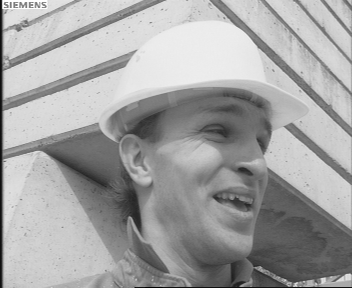

U:


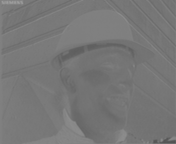

V:


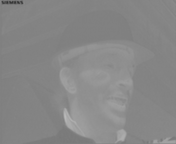

In [233]:
Y, U, V = LER_YUV('foreman.yuv', 352, 288, 10)
print("Y:")
show_Image(Y)
print("U:")
show_Image(U)
print("V:")
show_Image(V)
print()


### 1.2

#### Função recursiva para dobrar o tamanha de uma matriz, copiando pixels próximos 

In [234]:
#A função recebe uma imagem em forma de matriz e um inteiro(reps) e retorna uma imagem interpolada(aumentada) em 2^reps vezes
def interpolate(img_matrix:np.array, reps:int=1)->Image:
    '''
    RECEBE
        img:np.array -> array da Imagem para interpolar
        alpha:float -> OPCIONAL: numero de vezes para interpolar. DEFAULT=1
    RETORNA
        a imagem interpolada no formato Image da bilioteca PIL
    '''
    if reps == 0:
        img_matrix_interp = np.array(np.round(img_matrix), dtype='uint8')
        img_interpolated = Image.fromarray(img_matrix_interp, mode='L')     
        return img_interpolated
    img_matrix_interp = double_sized_matrix(img_matrix)
    img_matrix_interp = fill_pixels_proximity(img_matrix_interp)
    return interpolate(img_matrix_interp, reps-1)

#cria uma matriz de dobro do tamanha encaixando linhas e colunas cheias de zeros no meio das linhas e colunas originais
def double_sized_matrix(img_matrix:np.array)->np.array:
    size = np.array(img_matrix.shape)
    img_matrix_interp = np.zeros(size*2)
    for l in range(0, img_matrix_interp.shape[0], 2):
        for c in range(0, img_matrix_interp.shape[1], 2):
            img_matrix_interp[l][c] = img_matrix[int(l/2)][int(c/2)]
    return img_matrix_interp

#preenche os zeros da matriz
def fill_pixels_proximity(matrix:np.array)->np.array:
    for l in range(1, matrix.shape[0]-1, 2):                          #pula de dois em dois pra n alterar os pixels originais
        for c in range(0, matrix.shape[1], 2):                        #pula de dois em dois pra ignorar as colunas apenas com zeros
            matrix[l][c] = matrix[l-1][c]                             #copia o pixel superior 
    for c in range(1, matrix.shape[1]-1, 2):                          #pula de dois em dois pra ignorar as colunas que estão cheias devido ao loop acima
       for l in range(0, matrix.shape[0]):                            #vai em cada linha pois as colunas estao cheias
            matrix[l][c] = matrix[l][c-1]                             #copia o pixel da esquerda, já que o de cima foi criado no outro loop 
    matrix[:,-1] = matrix[:,-2]           #como pulamos de 2 em 2 a partir do index 1, matrizes com l ou c pares 
    matrix[-1,:] = matrix[-2,:]       #ficam com zeros nos cantos inferior e direito
    return matrix

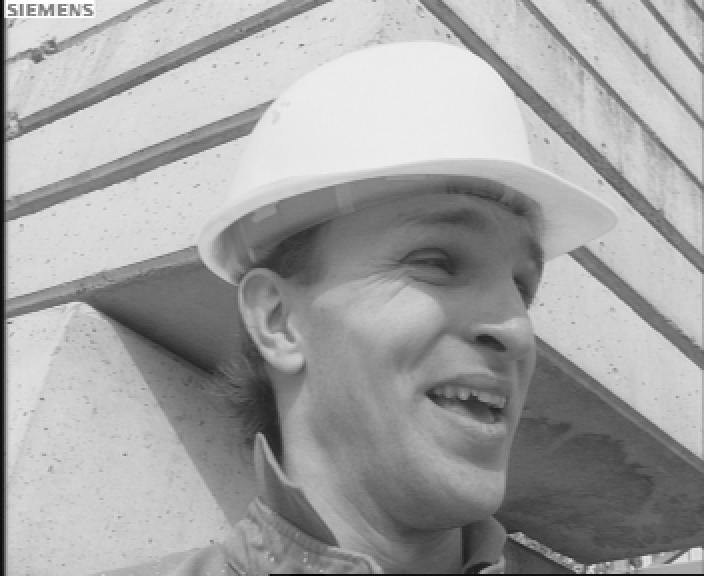

In [235]:
matrix = Y
interpolate(matrix)

### 1.3

#### Modifição da Função em 1.2 para fazer a média entre os pixels próximos

In [236]:
#A função recebe uma imagem em forma de matriz e um inteiro(reps) e retorna uma imagem interpolada(aumentada) em 2^reps vezes
def interpolate_2(img_matrix:np.array, reps:int=1)->Image:
    '''
    RECEBE
        img:np.array -> array da Imagem para interpolar
        alpha:float -> OPCIONAL: numero de vezes para interpolar. DEFAULT=1
    RETORNA
        a imagem interpolada no formato Image da bilioteca PIL
    '''
    if reps == 0:
        img_matrix_interp = np.array(img_matrix, dtype='uint8')
        img_interpolated = Image.fromarray(img_matrix_interp, mode='L')     
        return img_interpolated
    img_matrix_interp = double_sized_matrix(img_matrix)
    img_matrix_interp = fill_pixels_SAM(img_matrix_interp)
    return interpolate_2(img_matrix_interp, reps-1)

#preenche os zeros da matrix
def fill_pixels_SAM(matrix:np.array)->np.array:
    for l in range(1, matrix.shape[0]-1, 2):                          #pula de dois em dois pra n alterar os pixels originais
        for c in range(0, matrix.shape[1], 2):                        #pula de dois em dois pra ignorar as colunas apenas com zeros
            matrix[l][c] = (matrix[l+1][c]+matrix[l-1][c])/2          #preenche todas os zeros das colunas com a media dos pixels vizinhos verticalmente
    for c in range(1, matrix.shape[1]-1, 2):                          #pula de dois em dois pra ignorar as colunas que estão cheias devido ao loop acima
       for l in range(0, matrix.shape[0]):                            #vai em cada linha pois as colunas estao cheias
            matrix[l][c] = (matrix[l][c+1]+matrix[l][c-1])/2          #preenche todas os zeros das linhas com a media dos pixels vizinhos horizontalmente
    matrix[:,-1] = matrix[:,-2]         #como pulamos de 2 em 2 a partir do index 1, matrizes com l ou c pares 
    matrix[-1,:] = matrix[-2,:]       #ficam com zeros nos cantos inferior e direito
    return matrix


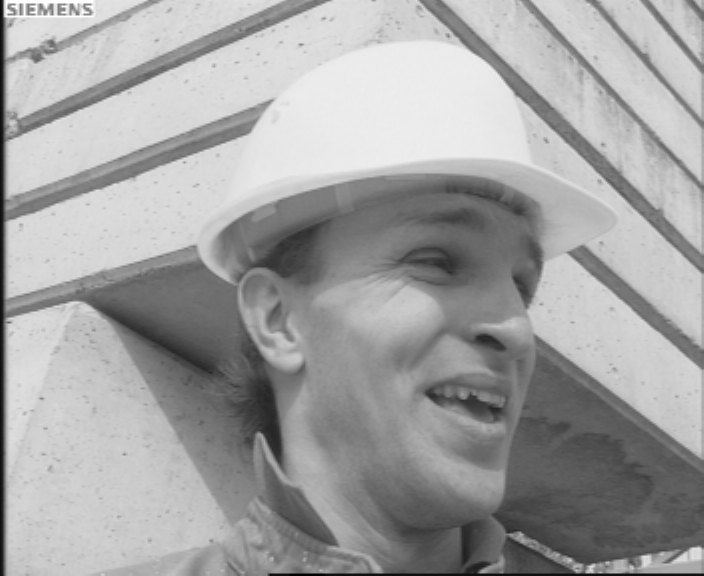

In [237]:
interpolate_2(matrix)

### 1.4

#### Função para trasnformar YUV para RGB, importada pelo github nas referências

In [238]:
def YUV2RGB( yuv ):
      
    m = np.array([[ 1.0, 1.0, 1.0],
                 [-0.000007154783816076815, -0.3441331386566162, 1.7720025777816772],
                 [ 1.4019975662231445, -0.7141380310058594 , 0.00001542569043522235] ])
    
    rgb = np.dot(yuv,m)
    rgb[:,:,0]-=179.45477266423404
    rgb[:,:,1]+=135.45870971679688
    rgb[:,:,2]-=226.8183044444304
    rgb = np.clip(rgb, 0, 255)
    
    return rgb.astype(np.uint8)

#### YUV transformado em RGB por cópia de pixels próximos

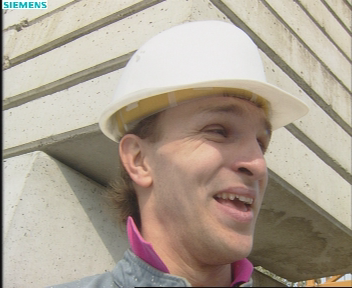

In [239]:
U_2x = interpolate(U)
V_2x = interpolate(V)
YUV = np.stack((Y, np.array(U_2x), np.array(V_2x)), axis=-1)
RGBimg =YUV2RGB(YUV)
show_Image(RGBimg)

#### YUV transformado em RGB por média simples de pixels próximos

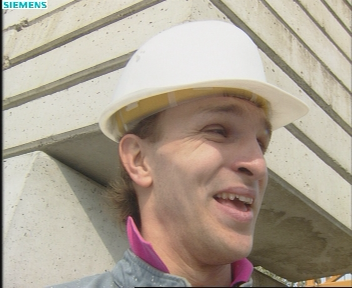

In [240]:
U_2x = interpolate_2(U)
V_2x = interpolate_2(V) 
YUV = np.stack((Y, np.array(U_2x), np.array(V_2x)), axis=-1)
RGBimg =YUV2RGB(YUV)
show_Image(RGBimg)

### 1.5

#### Interpolando todos os componentes para manter o padrão 4:2:0

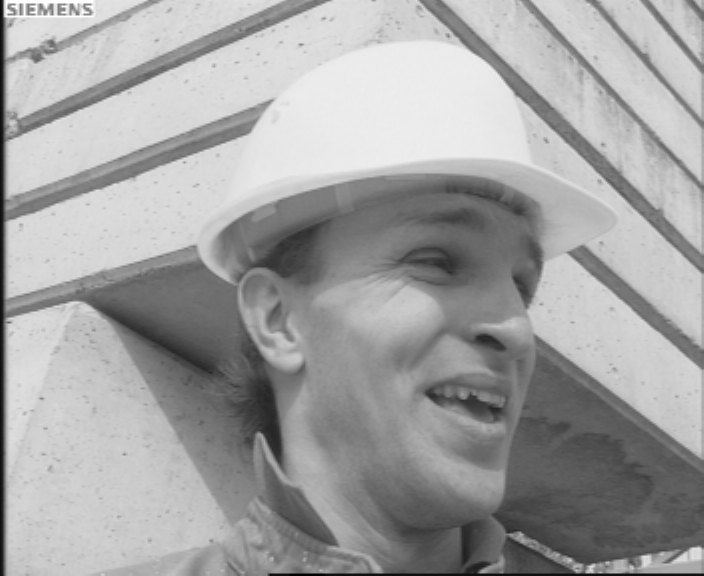

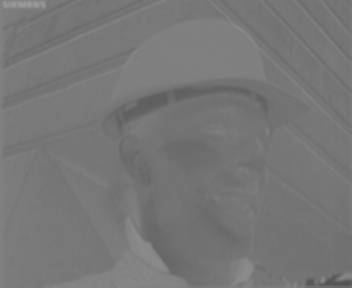

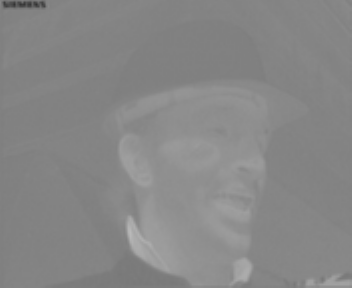

In [241]:
Y_2x = interpolate_2(Y)
U_2x = interpolate_2(U)
V_2x = interpolate_2(V)
display(Y_2x)
display(U_2x)
V_2x

## Questão 2

#### Função para aguçamento de Imagem

In [242]:
def imgSharpening(img:np.array, laplacianFilter:int, gaussian:int=None, alpha:float=7/8)->Image:
    '''
    RECEBE
        img:np.array -> array da Imagem para aguçar
        laplacianFilter:int -> valor do centro positivo do kernel laplaciano 3x3
        gaussian:int=None -> OPCIONAL: valor do sigma^2 caso queria um filtro gaussiano antes do laplaciano
        alpha:float -> OPCIONAL: valor do peso da Imagem original ao aplicar o filtro. DEFAULT=7/8
    RETORNA
        a imagem aguçada no formato Image da bilioteca PIL
    '''
    laplacian_kernel = np.array([
        [0, -1, 0],
        [-1, laplacianFilter, -1],
        [0, -1, 0]
    ])
    if gaussian != None:
        img = cv2.GaussianBlur(img, (3, 3), gaussian)
    laplacian = cv2.filter2D(img, -1, laplacian_kernel)
    print("Laplaciano")
    show_Image(laplacian)
    img = cv2.addWeighted(img, alpha, laplacian,(1-alpha), 0)
    return img

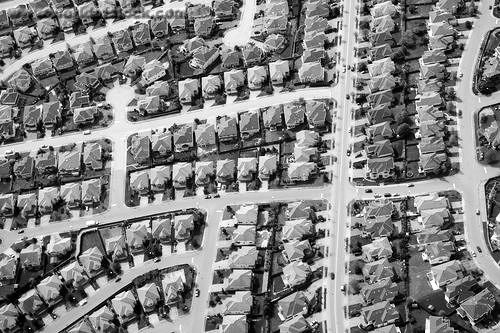

In [243]:
image = Image.open("Image1.pgm")
image

### 2.1 
Uma figura com o resultado de fazer o aguçamento utilizando diretamente o filtro
Laplaciano de tamanho 3x3, em todas as direçoes (+/- 8 no centro)

Laplaciano


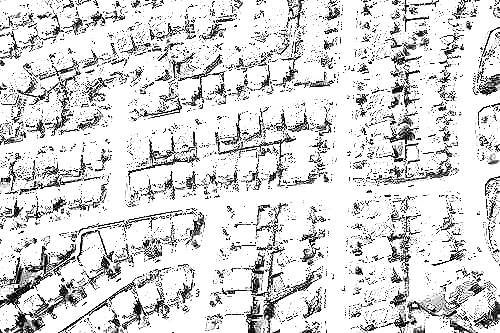

Imagem após aguçamento


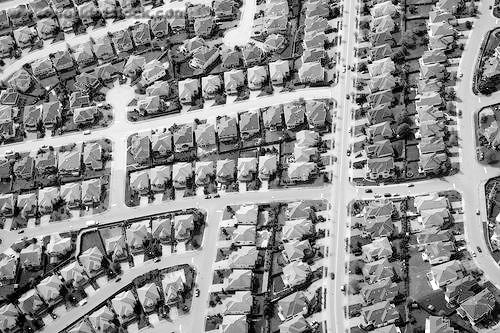

In [244]:
sharp1 = imgSharpening(np.array(image), laplacianFilter=8)
print("Imagem após aguçamento")
show_Image(sharp1)

### 2.2 
Uma figura com o resultado de primeiro utilizar um filtro de suavização Gaussiano de
tamanho 3x3 com sigma^2=0,5 e depois, o filtro Laplaciano de tamanho 3x3 com +/- 4 no centro.

Laplaciano


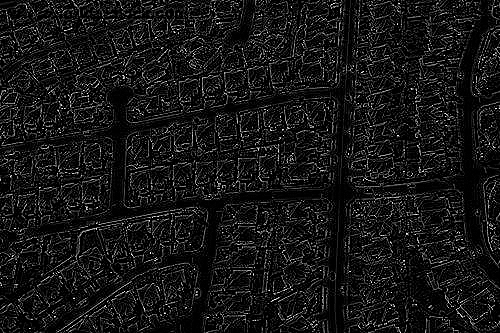

Imagem após aguçamento


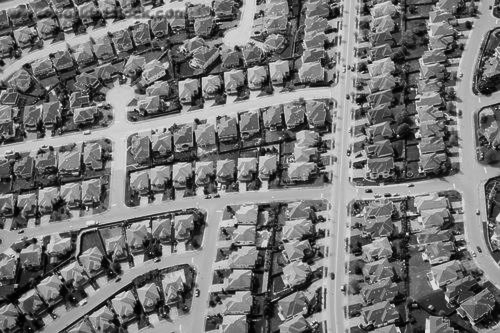

In [245]:
sharp2 = imgSharpening(np.array(image), laplacianFilter=4, gaussian=0.5)
print("Imagem após aguçamento")
show_Image(sharp2)

### 2.3
Uma figura com o resultado de primeiro utilizar um filtro de suavização Gaussiano de
tamanho 3x3 com sigma^2=1 e depois, o filtro Laplaciano de tamanho 3x3 com +/- 4 no centro.

Laplaciano


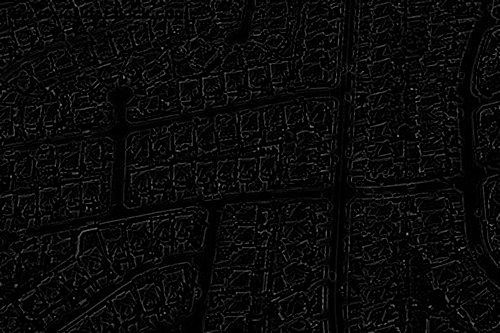

Imagem após aguçamento


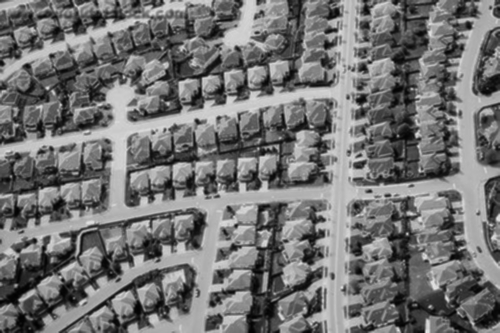

In [246]:
sharp3 = imgSharpening(np.array(image), laplacianFilter=4, gaussian=1)
print("Imagem após aguçamento")
show_Image(sharp3)

### 2.4 Melhor imagem

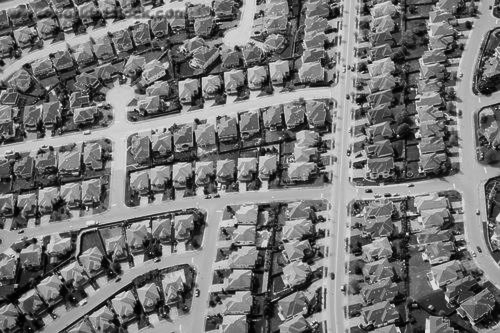

In [247]:
show_Image(sharp2)

## Questão 3

Filtro rejeita-notch por meio de filtros passa-altas Butterworth

### Implementação

In [248]:
warnings.filterwarnings("ignore")

def butterworth_notch_filter(dimensions:tuple, D0:int, uk:int, vk:int, order:int=4)->np.array:
    '''
    RECEBE
        dimensions:tuple -> dimensoes da Imagem
        D0:int -> raio do filtro
        uk:int -> coordenada do centro da altura para filtrar
        vk:int -> coordenada do centro da largura para filtrar
        order:int -> ordem do filtro. DEFAULT=4
    RETORNA
        a imagem interpolada no formato Image da bilioteca PIL
    '''

    height, width = dimensions
    u = np.array([[h for _ in range(width)] for h in range(height)]) # colunas com "numero da linha"
    v = np.array([[w for w in range(width)] for _ in range(height)]) # colunas com "numero da coluna"

    Dk = np.sqrt((u - height//2 - uk)**2 + (v - width//2 - vk)**2)
    D_k = np.sqrt((u - height//2 + uk)**2 + (v - width//2 + vk)**2)

    # ideal filter:
    #H = np.logical_or((Dk<=D0),(D_k<=D0))
    #H = np.logical_not(H).astype('int8')
    
    # equation =>
    H =( 1 /( 1 +(D0 / Dk )**(2*order)) )*( 1 /( 1 +(D0 /D_k )**(2*order)) )

    return H

### 3.1
Imagem Original

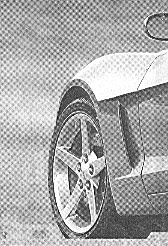

In [249]:
img3 = Image.open("moire.tif")
img3

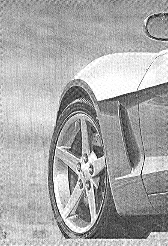

In [250]:
#colocando imagem no domínio frequência
img_fft = np.fft.fft2(img3)
fft_shift = np.fft.fftshift(img_fft)
img_shape = np.array(img3).shape

#aplicar filtro
notch_filter = butterworth_notch_filter(img_shape, 10, 39, 30)
notch_filter *= butterworth_notch_filter(img_shape, 10, -39, 30)
notch_filter *= butterworth_notch_filter(img_shape, 5, 78, 30)
notch_filter *= butterworth_notch_filter(img_shape, 5, -78, 30)
result_freq = fft_shift * notch_filter 
#voltar para domínio espacial
result_ishift = np.fft.ifftshift(result_freq)
result_complex = np.fft.ifft2(result_ishift) 
result_array = np.abs(result_complex)
result_img=Image.fromarray(result_array).convert('L') # modo 'F' gera png
result_img

## Referências

YUV para RGB: https://gist.github.com/Quasimondo/c3590226c924a06b276d606f4f189639